In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('jamb_exam_results.csv')
df

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1


In [6]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.isna().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
student_id                        0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [12]:
df = df.fillna(0)
df.isna().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state = 1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['jamb_score'].values
y_val = df_val['jamb_score'].values
y_test = df_test['jamb_score'].values

In [17]:
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [18]:
from sklearn.feature_extraction import DictVectorizer

In [19]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dict)

In [20]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [21]:
X_train.shape, X_val.shape

((3000, 29), (1000, 29))

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
regressor = DecisionTreeRegressor(max_depth=1)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [26]:
y_pred = regressor.predict(X_val)
y_pred

array([188.59301587, 155.24421053, 188.59301587, 155.24421053,
       188.59301587, 188.59301587, 188.59301587, 155.24421053,
       155.24421053, 188.59301587, 188.59301587, 188.59301587,
       155.24421053, 188.59301587, 155.24421053, 155.24421053,
       155.24421053, 155.24421053, 188.59301587, 155.24421053,
       188.59301587, 155.24421053, 188.59301587, 188.59301587,
       188.59301587, 188.59301587, 155.24421053, 155.24421053,
       155.24421053, 188.59301587, 188.59301587, 188.59301587,
       155.24421053, 188.59301587, 188.59301587, 155.24421053,
       155.24421053, 188.59301587, 155.24421053, 155.24421053,
       155.24421053, 155.24421053, 188.59301587, 155.24421053,
       155.24421053, 188.59301587, 188.59301587, 188.59301587,
       155.24421053, 188.59301587, 155.24421053, 155.24421053,
       155.24421053, 188.59301587, 188.59301587, 188.59301587,
       188.59301587, 155.24421053, 188.59301587, 155.24421053,
       188.59301587, 188.59301587, 155.24421053, 155.24

In [29]:
from sklearn.tree import export_text
print(export_text(regressor, feature_names=dv.get_feature_names_out()))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [32]:
y_pred = rf.predict(X_val)
y_pred

array([234.7, 145. , 195.2, 139.4, 196.8, 249.9, 222.5, 211.1, 164.3,
       222.9, 201.2, 172.5, 189. , 202.7, 169.9, 138.8, 160.9, 131.7,
       179.5, 128.3, 189.1, 139.1, 198.2, 194.2, 215.5, 183.6, 160.2,
       154.9, 140.9, 147.4, 189.8, 218.6, 140.6, 163.9, 222. , 140. ,
       150.4, 191.1, 165.1, 168.1, 180.4, 142.7, 191.9, 150.8, 121.9,
       154.8, 182.1, 194.1, 148.9, 197.3, 145.2, 157.5, 158.4, 226.7,
       262.6, 230.2, 177.6, 152.2, 157.5, 150.5, 199.2, 160.1, 143.5,
       157.2, 141.2, 209.1, 260.3, 178.4, 198.5, 149.3, 186.3, 148.4,
       199.4, 160.4, 163.3, 149.3, 280.7, 156.5, 167.4, 197.2, 220.4,
       189.2, 141.1, 179.7, 201.8, 145. , 186.3, 131.9, 162.8, 160.7,
       160.6, 160.6, 162.1, 158.4, 151.3, 126.2, 147.6, 176.8, 180.7,
       171.8, 134. , 204.4, 192.5, 195.5, 164.9, 174.8, 177.3, 132.1,
       207.6, 126.8, 186.4, 175.9, 184.8, 155.3, 253.3, 145.3, 220.3,
       168.4, 204.2, 160.7, 137.7, 144.7, 155.4, 133.7, 228.5, 171.5,
       170. , 202.2,

In [35]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_val, y_pred)
rmse

42.13724207871227

In [36]:
rmse_scores = []
for n in range(10,201, 10):
    rf = RandomForestRegressor(n_estimators=n,
                            random_state=1,
                            n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)

    rmse = root_mean_squared_error(y_pred, y_val)
    rmse_scores.append((n,rmse))

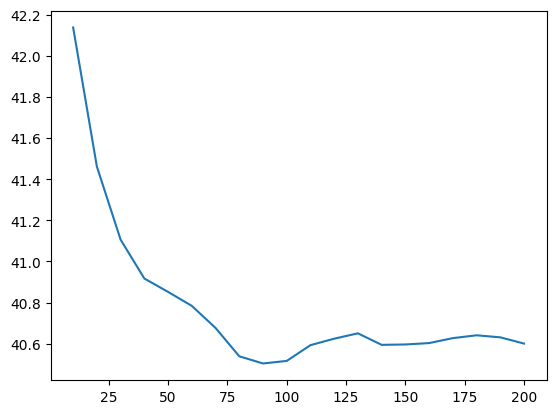

In [38]:
scores = pd.DataFrame(rmse_scores, columns=['n_estimator','rmse'])
plt.plot(scores.n_estimator, scores.rmse)

In [39]:
rmse_scores = []
for d in [10, 15, 20, 25]:
    for n in range(10,201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                random_state=1,
                                n_jobs=-1,
                                max_depth = d)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
    
        rmse = root_mean_squared_error(y_pred, y_val)
        rmse_scores.append((n,d,rmse))

In [40]:
scores = pd.DataFrame(rmse_scores, columns=['n_estimator', 'max_depth', 'rmse'])
scores.head()

,n_estimator,max_depth,rmse
0,10,10,41.258349
1,20,10,40.880528
2,30,10,40.624956
3,40,10,40.270069
4,50,10,40.317006


In [49]:
rmse_values = scores.rmse.values
np.mean(rmse_values)

np.float64(40.663844923811155)

In [45]:
scores.sort_values(by='rmse', ascending=False)

,n_estimator,max_depth,rmse
60,10,25,42.160439
40,10,20,42.024831
20,10,15,42.003979
61,20,25,41.470970
21,20,15,41.455699
...,...,...,...
5,60,10,40.277035
3,40,10,40.270069
9,100,10,40.250490
7,80,10,40.210305


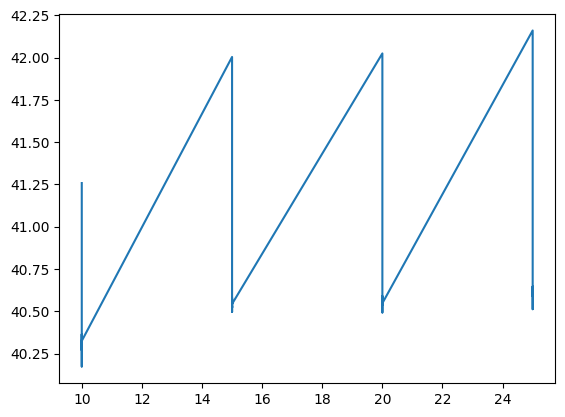

In [54]:
plt.plot(scores.max_depth, scores.rmse)
max_depth = 15

In [55]:
rf = RandomForestRegressor(n_estimators=10,
                            max_depth=20,
                            random_state=1,
                            n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [56]:
rf.feature_importances_

array([0.0123254 , 0.01026189, 0.06931145, 0.03151679, 0.14972903,
       0.1364858 , 0.01345934, 0.00913136, 0.00928871, 0.01038263,
       0.01771934, 0.01240405, 0.00914148, 0.        , 0.01545036,
       0.01695692, 0.01448862, 0.02291885, 0.01335761, 0.01149201,
       0.00955909, 0.00923932, 0.0089532 , 0.00840598, 0.02571426,
       0.01070798, 0.01056268, 0.24835361, 0.08268222])

In [57]:
list(zip(dv.get_feature_names_out(), rf.feature_importances_))

[('access_to_learning_materials=No', np.float64(0.012325395818561702)),
 ('access_to_learning_materials=Yes', np.float64(0.010261891957053597)),
 ('age', np.float64(0.06931145469695398)),
 ('assignments_completed', np.float64(0.03151678945460071)),
 ('attendance_rate', np.float64(0.1497290297846747)),
 ('distance_to_school', np.float64(0.1364858048632369)),
 ('extra_tutorials=No', np.float64(0.013459336291731934)),
 ('extra_tutorials=Yes', np.float64(0.009131355726749437)),
 ('gender=Female', np.float64(0.009288710588929935)),
 ('gender=Male', np.float64(0.010382634572648446)),
 ('it_knowledge=High', np.float64(0.0177193420394119)),
 ('it_knowledge=Low', np.float64(0.012404050525957137)),
 ('it_knowledge=Medium', np.float64(0.009141479881545294)),
 ('parent_education_level', np.float64(0.0)),
 ('parent_education_level=Primary', np.float64(0.01545036018792814)),
 ('parent_education_level=Secondary', np.float64(0.016956919815100068)),
 ('parent_education_level=Tertiary', np.float64(0.014

In [58]:
import xgboost as xgb

In [59]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [66]:
evals = [(dtrain, 'train'), (dval, 'eval')]


In [75]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [76]:
model = xgb.train(
    xgb_params,
    dtrain, 
    num_boost_round = 100,
    evals = evals,
    verbose_eval = True,

)

[0]	train-rmse:42.69384	eval-rmse:44.89114
[1]	train-rmse:39.83326	eval-rmse:43.07010
[2]	train-rmse:37.94542	eval-rmse:42.00332
[3]	train-rmse:36.56125	eval-rmse:41.46452
[4]	train-rmse:35.44252	eval-rmse:40.88896
[5]	train-rmse:34.57756	eval-rmse:40.69096
[6]	train-rmse:33.84230	eval-rmse:40.59315
[7]	train-rmse:33.25929	eval-rmse:40.47993
[8]	train-rmse:32.79415	eval-rmse:40.45326
[9]	train-rmse:32.16019	eval-rmse:40.43929
[10]	train-rmse:31.63404	eval-rmse:40.48319
[11]	train-rmse:31.17673	eval-rmse:40.68201
[12]	train-rmse:30.87313	eval-rmse:40.63522
[13]	train-rmse:30.30310	eval-rmse:40.70983
[14]	train-rmse:30.00098	eval-rmse:40.78133
[15]	train-rmse:29.41497	eval-rmse:40.86107
[16]	train-rmse:29.25816	eval-rmse:40.96580
[17]	train-rmse:28.59378	eval-rmse:41.12190
[18]	train-rmse:28.27990	eval-rmse:41.14360
[19]	train-rmse:27.94572	eval-rmse:41.22835
[20]	train-rmse:27.49658	eval-rmse:41.27921
[21]	train-rmse:27.25449	eval-rmse:41.32427
[22]	train-rmse:27.06652	eval-rmse:41.4188

In [77]:
y_pred = model.predict(dval)
root_mean_squared_error(y_val, y_pred)

43.418819427490234